<a href="https://colab.research.google.com/github/jcardonamde/Exploring_data_DataScienceBasics/blob/main/Exploring_data_DataScienceBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Inicialmente damos permito al aplicativo Drive para permitirnos acceder a nuestro dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importamos la libreria Pandas, la cual usaremos en nuestro proceso de limpieza de los datos
import pandas as pd

In [3]:
# Importamos nuestro dataset para iniciar la exploración
filename = ('/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Semana02/Examen Cinturon/Mod_employee_attrition.xlsx')
df = pd.read_excel(filename)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,3.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,Research & Development,2.0,2.0,Other,1.0,4.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,4.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,Research & Development,2.0,1.0,Medical,1.0,7.0,1.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


# **1) The first step in this process is to use Python to clean the data to get it ready for analysis. You must:**

* Identify and address any duplicate values

* Identify and address any missing values in this dataset. Deal with these appropriately. Include a brief description of the     method you used to deal with missing values along with a justification for that method.

* Ensure all columns match the data types listed in the data dictionary.

* Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)

* Identify and address any inappropriate or unusual data points (example: age cannot be 325)

In [4]:
# Inicialmente verificamos si en el dataframe tenemos datos duplicados. 
# Por lo que usamos el método Duplicated junto al de Sum para obtener la cantidad de datos que se repiten.
df.duplicated()
df.duplicated().sum()

5

Como pudimos identificar en el paso anterior tenemos 5 filas repetidas. Asi que vamos a remover dichos duplicados para que no interfieran en nuestro analisis.

In [5]:
# Usamos el metodo drop_duplicates para realizar esta acción.
# Por consiguiente volvemos a lanzar una sumatoria de si se encuentra aún duplicados.
df = df.drop_duplicates()
df.duplicated().sum()

0



---



Perfecto, al momento ya no contamos con datos duplicados. Ahora vamos a identificar si el dataset tiene datos faltantes que debamos abordar y corregir.

In [6]:
# Inicialmente examino el número de valores unicos entre las columnas con las cuales estamos trabajando
df.nunique()

Age                           44
Attrition                      2
BusinessTravel                 3
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         1
HourlyRate                    72
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
DailyRate                     71
WeeklyRate                    71
YearlyRate                    71
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
# Tambien revisamos el numero de valores que se tienen por Columna y su tipo de Dato
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   float64
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    588 non-null    object 
 11  HourlyRate                1470 non-null   object 
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

De los anteriores analisis, hay algo que me llama la atención y es que tanto usando el metodo Unique que me dice cuantos valores únicos hay en cada Columna me indica que para el caso de la **Columna Gender** solo hay un tipo de genero. 

Lo anterior no se me hace normal dado que sea una empresa con tantos empleados no creeria que fuese de solo de un genero. Minimamente deberiamos tener dos.

Por lo que posteriormente hice uso del método info, el cual me ayuda a revisar el número de filas, columnas, tipo de datos y valores faltantes. 

Con esto me encuentro de que todas las columnas representan un comportamiento homogeneo de 1470 datos por columna a excepción de la columna **Gender** que tan solo tiene 588 datos. Osea tenemos tan solo un 40% de lo que deberia ser el total de datos para dicha columna.

Explorare más a fondo dicha columna con un conteo de valores.

In [8]:
# Hago uso del método value_counts para saber a que esta asociado esos 588 datos.
df['Gender'].value_counts()

Female    588
Name: Gender, dtype: int64

Me encuentro que los 588 datos estan asociados a un valor unico llamado Female. 

In [9]:
# Hago una exploración con la función .isna que me ayuda a encontrar que valor existe y no existe por cada fila
df['Gender'].isna().head(10)

0    False
1     True
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
Name: Gender, dtype: bool

Observo que hay varias filas que contienen información de empleados pero sin relación de genero. Asi que creo un filtro para ver que otra información poseen esos empleados que no estan relacionados a un genero para identificar algún posible patrón.

In [10]:
# Vuelvo a hacer uso de la función .isna junto a la busqueda segmentada mediante la función loc
# Que permite obtener un especto de los valores por empleado relacionado a su respectiva fila y columna
gender_missing = df['Gender'].isna()
df.loc[gender_missing,:]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49.0,No,Travel_Frequently,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,3.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,Research & Development,2.0,2.0,Other,1.0,4.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
4,27.0,No,Travel_Rarely,Research & Development,2.0,1.0,Medical,1.0,7.0,1.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
5,32.0,No,Travel_Frequently,Research & Development,2.0,2.0,Life Sciences,1.0,8.0,4.0,...,3.0,80.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0
7,30.0,No,Travel_Rarely,Research & Development,24.0,1.0,Life Sciences,1.0,11.0,4.0,...,2.0,80.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,36.0,No,Travel_Frequently,Research & Development,23.0,2.0,Medical,1.0,2061.0,3.0,...,3.0,80.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1471,39.0,No,Travel_Rarely,Research & Development,6.0,1.0,Medical,1.0,2062.0,4.0,...,1.0,80.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1472,27.0,No,Travel_Rarely,Research & Development,4.0,3.0,Life Sciences,1.0,2064.0,2.0,...,2.0,80.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0
1473,49.0,No,Travel_Frequently,Sales,2.0,3.0,Medical,1.0,2065.0,4.0,...,4.0,80.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0


In [11]:
# Identificando si hay algun patron que muestre dónde se encuentran los datos faltantes
df.loc[0:20, 'Gender']

0     Female
1        NaN
2        NaN
3     Female
4        NaN
5        NaN
6     Female
7        NaN
8        NaN
9        NaN
10       NaN
11    Female
12       NaN
13       NaN
15       NaN
16    Female
17       NaN
18       NaN
19    Female
20       NaN
Name: Gender, dtype: object

In [12]:
# Hacemos un conteo del número de valores perdidos para la columna de Gender.
df['Gender'].isna().sum()

882

# **Lo anterior me lleva a analizar lo siguiente para una toma de decisiones:**


*   Tengo 882 filas con datos faltantes que representarian un **60%** del total de datos que deberiamos, recordando que por columana tenemos un comportamiento homogeneo de 1470 valores.

*   Si decido omitir ese número de 882 empleados sin genero en mi dataset, solo estaria sesgado a manejar un analisis de empleados con genero Femenino y no tendria una valoración global del por que de la deserción tanto para mujeres como empleados de posiblemente genero Masculino en la empresa.

* Tambien si decido eliminar las 882 filas estaria trabajando con menos de la mitad de los datos lo que me llevaria a unas conclusiones incompletas de cara al futuro.

* Si decido hacer un manejo de estos datos faltantes con un relleno, de que dichos datos faltantes esten asociados a un genero Tipo Masculino. Tendria completo mi data en cuanto a cantidad de valores correctos por columnas pero en primera medida no podria definir que de esas 822 filas sin genero realmente todos pertenezcan a un genero masculino.

▶▶▶  **Conclusión:** :

*Analizando el dataset, basandome en la cantidad de datos faltantes y el tipo de rol del empleado en la compañia. He decidido hacer un relleno de los datos faltantes en cuanto a genero, para que esten asociados a un valor de tipo genero masculino.*

*La anterior decisión la he tomado con la finalidad de que prefiero tener un relleno de los campos de dicha columna Gender, para tener un manejo mas completo de la información que realmente me puede ser mucho mas útil y que este asociada a otras columnas que me permitiesen analizar de manera mas concreta otros aspectos asociados a la deserción laboral.*



In [13]:
# Procedo a hacer el relleno de los valores NaN de la columna Gender haciendo uso del método fillna y el nuevo valor correspondiente
df['Gender'].fillna("Masculine", inplace = True)
df['Gender'].value_counts()

Masculine    882
Female       588
Name: Gender, dtype: int64

In [14]:
# Verifico que el número de valores ya sea completo en todas las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   float64
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   object 
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

In [15]:
# Mostrando la columna Gender para verificar que ya se tengan los valores para ambos generos
df.loc[: , ['Gender']]

,Gender
0,Female
1,Masculine
2,Masculine
3,Female
4,Masculine
...,...
1470,Masculine
1471,Masculine
1472,Masculine
1473,Masculine




---



Continuando con nuestra limpieza, revisamos de que nuestro dataset coincida con el diccionario de datos que se nos entrego para el analisis.

In [16]:
# Revisando nuevamente el tipo de datos en nuestro dataset usando el método info para identificar los cambios a realizar
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   float64
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   float64
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   object 
 12  JobInvolvement            1470 non-null   float64
 13  JobLevel                  1470 non-null   float64
 14  JobRole 

Realizo la conversión para que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.

In [17]:
# Procedemos a hacer la correción de los tipos de datos de tipo float a tipo Integer usando el método astype(type)
df['Age'] = df['Age'].astype(int)
df['DistanceFromHome'] = df['DistanceFromHome'].astype(int)
df['Education'] = df['Education'].astype(int)
df['EmployeeCount'] = df['EmployeeCount'].astype(int)
df['EmployeeNumber'] = df['EmployeeNumber'].astype(int)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(int)
df['JobInvolvement'] = df['JobInvolvement'].astype(int)
df['JobLevel'] = df['JobLevel'].astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(int)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(int)
df['PerformanceRating'] = df['PerformanceRating'].astype(int)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(int)
df['StandardHours'] = df['StandardHours'].astype(int)
df['StockOptionLevel'] = df['StockOptionLevel'].astype(int)
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].astype(int)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(int)
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].astype(int)
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].astype(int)
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].astype(int)
 

Durante el procedimiento encontre un par de columnas que me presentaban problema en la conversión.

Por lo que procedi a identificar a raiz del error que incoherencia se tenia en los valores categoricos de las columnas **HourlyRate** y **YearsAtCompany**

In [18]:
# Procedemos a hacer la correción de los tipos de datos de tipo Object a tipo Integer 
# Usando el método replace para hacer la correción en conversión de un valor categorico en especial y posterior el uso del astype(type)
df['HourlyRate'] = df['HourlyRate'].replace('94_', 94)
df['HourlyRate'] = df['HourlyRate'].astype(int)

In [19]:
# Procedemos a hacer la correción de los tipos de datos de tipo Object a tipo Integer 
# Usando el método replace para hacer la correción en conversión de un valor categorico en especial y posterior el uso del astype(type)
df['YearsAtCompany'] = df['YearsAtCompany'].replace('5!', 5)
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)

In [20]:
# Finalmente validamos y confirmamos que la comparativa con el diccionario de datos y nuestro dataset es correcta respecto al tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [21]:
# Verifico nuevamente si tengo valores perdidos en mi dataset para estar seguro de que todo este en orden
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
DailyRate                   0
WeeklyRate                  0
YearlyRate                  0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
# Empiezo a utilizar el metodo .value_counts() nuevamente para examinar cada columna y ver si aún se tienen datos inapropiados o inusuales
df['Age'].value_counts()

35     78
34     77
36     69
31     69
29     68
32     61
30     60
33     58
38     58
40     57
37     50
27     48
28     48
42     46
39     42
45     41
41     40
26     39
44     33
46     33
43     32
50     30
24     26
25     26
49     24
47     24
55     22
53     19
48     19
51     19
54     18
52     18
22     16
23     14
56     14
58     13
21     13
20     11
59     10
19      9
18      8
60      5
57      4
578     1
Name: Age, dtype: int64

Luego de haber utilizado la anterior acción para cada columna logre encontrar una anomalia en un dato incongruente y era que en la columna **Age** un empleado tenia una edad de 578 años. Lo cual era un error.

Por ello procedo a ejecutar el correctivo.

In [23]:
# Usando el método replace para hacer la correción en conversión de un valor categorico en especial
df['Age'] = df['Age'].replace(578, 57)
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    13
21    13
20    11
59    10
19     9
18     8
57     5
60     5
Name: Age, dtype: int64



---



# **2) The next step is to complete an exploration based on the data using Python. This should include:**

* Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.

* Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.

In [24]:
# Inicialmente procedemos a importar las libreria matplotlib y Seaborn para hacer uso de los graficos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy.random import seed, randn

In [25]:
# Obtenemos una visual general de nuestras columnas para tenerlas a la mano cuando estemos trabajando con los gráficos
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'DailyRate',
       'WeeklyRate', 'YearlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Primer análisis:**

Este quiero enfocarlo hacia como se encuentra el grado de satisfacción actual de los empleados con su trabajo dentro de la compañia.

In [26]:
# Hago un ordenamiento de los datos por medio de la Columba Job Satisfaction
df_sorted = df.sort_values('JobSatisfaction', ascending=0)

In [27]:
# Organizo un filtro en el dataframe que me permita organizar de manera ascendente el nivel de satisfacción por empleado
# Al igual que visualizar algunos de los demás campos que puedan tener una relación en el sentido de dicha calificación hacia la empresa
df_sorted_job_satisfaction = df_sorted.sort_values('JobSatisfaction', ascending=True)
df_sorted_job_satisfaction.loc[:, ['JobSatisfaction', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'JobRole', 'JobLevel', 'JobInvolvement']]

,JobSatisfaction,Age,BusinessTravel,Department,DistanceFromHome,JobRole,JobLevel,JobInvolvement
1087,1,40,Travel_Rarely,Research & Development,9,Laboratory Technician,1,3
593,1,33,Travel_Rarely,Sales,16,Sales Executive,2,3
636,1,36,Travel_Rarely,Human Resources,8,Human Resources,1,2
111,1,51,Travel_Frequently,Research & Development,1,Healthcare Representative,3,2
1357,1,44,Travel_Rarely,Research & Development,1,Healthcare Representative,2,4
...,...,...,...,...,...,...,...,...
1259,4,49,Travel_Rarely,Sales,11,Sales Executive,2,3
1266,4,38,Travel_Rarely,Research & Development,18,Healthcare Representative,2,1
182,4,31,Travel_Rarely,Research & Development,12,Research Scientist,1,3
1274,4,43,Travel_Rarely,Human Resources,2,Human Resources,1,3


In [28]:
# Hago una sumatoria de los valores por nivel de satisfacción del trabajo entre cada empleado
df['JobSatisfaction'].value_counts(sum)

4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: JobSatisfaction, dtype: float64

In [29]:
# Procedo a generar el calculo respectivo para obtener más puntualmente el porcentaje de satisfacción con su rol entre el total global de empleados
listJobSatisfaction = df['JobSatisfaction'].values.tolist()
percentage_of_job_satisfaction1 = listJobSatisfaction.count(1)/len(listJobSatisfaction) * 100
percentage_of_job_satisfaction2 = listJobSatisfaction.count(2)/len(listJobSatisfaction) * 100
percentage_of_job_satisfaction3 = listJobSatisfaction.count(3)/len(listJobSatisfaction) * 100
percentage_of_job_satisfaction4 = listJobSatisfaction.count(4)/len(listJobSatisfaction) * 100
print("El porcentaje de empleados con un nivel de satisfacción 1 con su trabajo es de %.1f" % percentage_of_job_satisfaction1 + "%")
print("El porcentaje de empleados con un nivel de satisfacción 2 con su trabajo es de %.1f" % percentage_of_job_satisfaction2 + "%")
print("El porcentaje de empleados con un nivel de satisfacción 3 con su trabajo es de %.1f" % percentage_of_job_satisfaction3 + "%")
print("El porcentaje de empleados con un nivel de satisfacción 4 con su trabajo es de %.1f" % percentage_of_job_satisfaction4 + "%")

El porcentaje de empleados con un nivel de satisfacción 1 con su trabajo es de 19.7%
El porcentaje de empleados con un nivel de satisfacción 2 con su trabajo es de 19.0%
El porcentaje de empleados con un nivel de satisfacción 3 con su trabajo es de 30.1%
El porcentaje de empleados con un nivel de satisfacción 4 con su trabajo es de 31.2%


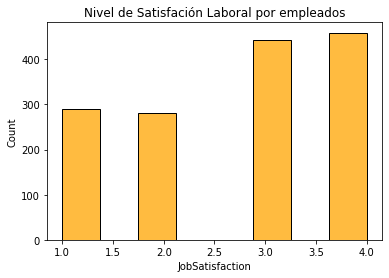

In [30]:
# Procedo a generar un grafico de barras mediante la herramienta de SeaBorn para identificar el volumen de empleados en su respectivo nivel de satisfacción en su rol laboral
sns.histplot(data = df_sorted_job_satisfaction, x = 'JobSatisfaction', bins = 8, color = "orange").set(title='Nivel de Satisfación Laboral por empleados')
sns.set(rc = {'figure.figsize':(16,12)})

# **Conclusión 1:** 

Podemos visualizar de que un poco más de la mitad de los empleados tiene un grado de satisfacción positivo respecto a su cargo dentro de la organización. El cual es de alrededor de un **61.3%** teniendo presente que se tomaria como niveles aceptables el 3 y 4.

Aunque preocupa un poco, que un **38.7 %** esten teniendo un percepción no tan favorable particularmente como se puede ver en la grafica entre estos, hay mas empleados inclinados hacia un nivel de satisfacción 1 que de grado medio como los seria de calificación 2.

Asi que se debe generar estrategias que permitan reducir esa brecha y aumentar el grado de satisfacción de estos dos ultimos grupos con niveles de satisfacción bajos. Para que a futuro no se siga teniendo un mala percepción y que aumente la deserción laboral. 




---



# **Segundo análisis:**

Continuando el escenario de sensaciones frente el trabajo. También se considera que el grado de solidez de las relaciones entre el equipo de trabajo tambien es muy influyente para que uno de los empleados decida quedarse o no en la compañia dependiendo de ese buen trabajo en equipo o percepción de inclusión por parte de sus compañeros.

Asi que a continuación analizare como se comporta el nivel de satisfación de las relaciones laboreles dentro de los empleados.



In [31]:
# Hago una sumatoria de los valores por nivel de satisfacción entre todos los empleados
df['RelationshipSatisfaction'].value_counts(sum)

3    0.312245
4    0.293878
2    0.206122
1    0.187755
Name: RelationshipSatisfaction, dtype: float64

In [32]:
# Procedo a generar el calculo respectivo para obtener más puntualmente el porcentaje de satisfacción frente a las relaciones laborales entre empleados
listRelationshipSatisfaction = df['RelationshipSatisfaction'].values.tolist()
percentage_of_relationship1 = listRelationshipSatisfaction.count(1)/len(listRelationshipSatisfaction) * 100
percentage_of_relationship2 = listRelationshipSatisfaction.count(2)/len(listRelationshipSatisfaction) * 100
percentage_of_relationship3 = listRelationshipSatisfaction.count(3)/len(listRelationshipSatisfaction) * 100
percentage_of_relationship4 = listRelationshipSatisfaction.count(4)/len(listRelationshipSatisfaction) * 100
print("El porcentaje de empleados con un nivel de satisfacción 1 con sus relaciones laborales es de %.1f" % percentage_of_relationship1 + "%")
print("El porcentaje de empleados con un nivel de satisfacción 2 con sus relaciones laborales es de %.1f" % percentage_of_relationship2 + "%")
print("El porcentaje de empleados con un nivel de satisfacción 3 con sus relaciones laborales es de %.1f" % percentage_of_relationship3 + "%")
print("El porcentaje de empleados con un nivel de satisfacción 4 con sus relaciones laborales es de %.1f" % percentage_of_relationship4 + "%")

El porcentaje de empleados con un nivel de satisfacción 1 con sus relaciones laborales es de 18.8%
El porcentaje de empleados con un nivel de satisfacción 2 con sus relaciones laborales es de 20.6%
El porcentaje de empleados con un nivel de satisfacción 3 con sus relaciones laborales es de 31.2%
El porcentaje de empleados con un nivel de satisfacción 4 con sus relaciones laborales es de 29.4%


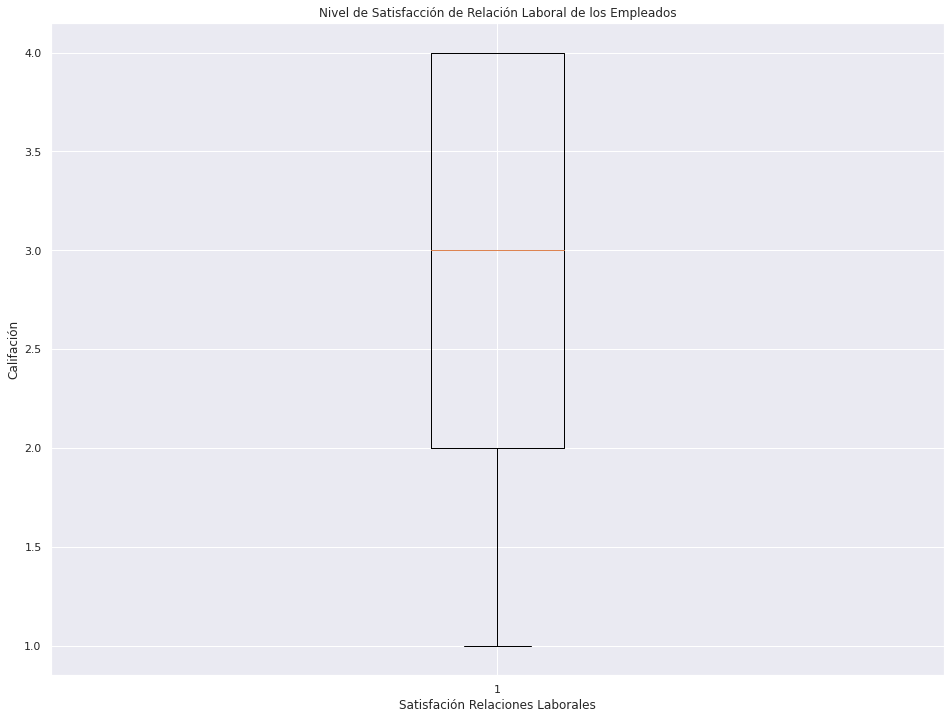

<Figure size 432x432 with 0 Axes>

In [33]:
# Hacemos uso de un gráfico de caja para visualizar el comportamiento de lo datos de la columna RelationshipSatisfaction
plt.boxplot(df.RelationshipSatisfaction)
plt.title("Nivel de Satisfacción de Relación Laboral de los Empleados")
plt.ylabel("Califación")
plt.xlabel("Satisfación Relaciones Laborales")
plt.figure(figsize=(6,6))
plt.show()

# **Conclusión 2:**

El anterior grafico nos permite visualizar que tenemos un promedio de respuestas que estan orientadas a un nivel de satisfación de tipo favorable en las relaciones laborales. En este caso representado por un nivel 3.

Por lo que tenemos más del 80% de los empleados con un grado de satisfación en sus relaciones laborales y a gusto con la convivencia con sus compañeros, entre los niveles 2 y 4.

Lo anterior nos permitiria focalizar el por que el 18.8% de los empleados sienten una mala relación laboral en su ambiente de trabajo, creando diversas estrategias que permitan mejorar los espacios de trabajo de equipo entre las diferentes areas de la compañia y apuntar a erradicar el mal ambiente laboral que es unas de las principales causas de deserción laboral.




---



# **Tercer análisis:**



In [34]:
# Procedo a generar el calculo respectivo para tener una idea más puntual sobre el porcentaje de empleados pertenecientes a cada Departamento de la empresa
listDepartments = df['Department'].values.tolist()
percentage_of_departament1 = listDepartments.count('Research & Development')/len(listDepartments) * 100
percentage_of_departament2 = listDepartments.count('Sales')/len(listDepartments) * 100
percentage_of_departament3 = listDepartments.count('Human Resources')/len(listDepartments) * 100
print("El porcentaje de empleados que pertenecen al Departamento de Research & Development es de %.1f" % percentage_of_departament1 + "%")
print("El porcentaje de empleados que pertenecen al Departamento de Sales es de %.1f" % percentage_of_departament2 + "%")
print("El porcentaje de empleados que pertenecen al Departamento de Human Resources es de %.1f" % percentage_of_departament3 + "%")

El porcentaje de empleados que pertenecen al Departamento de Research & Development es de 65.4%
El porcentaje de empleados que pertenecen al Departamento de Sales es de 30.3%
El porcentaje de empleados que pertenecen al Departamento de Human Resources es de 4.3%


In [35]:
# Genero un agrupamiento entre las columnas de Departamiento y Nivel de Satisfacción en el ambiente laboral
# Para luego obtener el conteo del numero de empleados por nivel de califación de este item de satisfacción
df.groupby(['Department', 'EnvironmentSatisfaction'])[['EmployeeCount']].sum()

EmployeeCount
Department             EnvironmentSatisfaction               
Human Resources        1                                   11
                       2                                   12
                       3                                   26
                       4                                   14
Research & Development 1                                  187
                       2                                  177
                       3                                  292
                       4                                  305
Sales                  1                                   86
                       2                                   98
                       3                                  135
                       4                                  127

In [36]:
# Sumatoria de calificaciones por Departamento para conocer el total de empleados por Departamento
Human_Resources = 11 + 12 + 26 + 14
Research_Development	= 187 + 177 + 292 + 305
Sales = 86 + 98 +135 + 127
print(f'El total de empleados del area de Human Resources es {Human_Resources}')
print(f'El total de empleados del area de Research & Development {Research_Development}')
print(f'El total de empleados del area de Sales es {Sales}')

El total de empleados del area de Human Resources es 63
El total de empleados del area de Research & Development 961
El total de empleados del area de Sales es 446


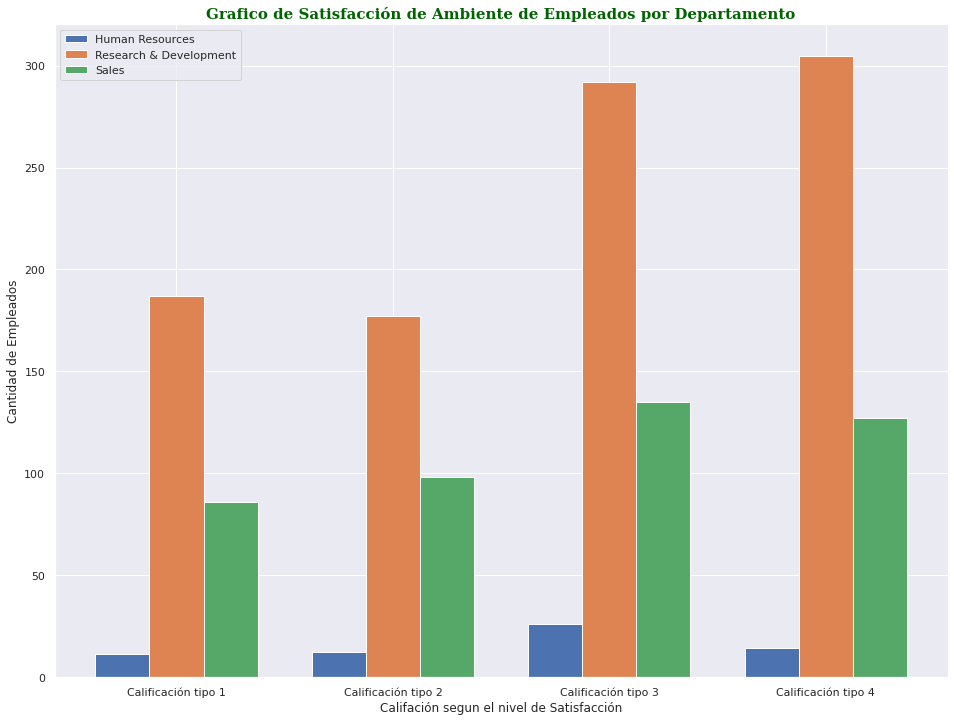

In [37]:
# Procedo a generar un grafico de barras donde uso los valores obtenidos en el anterior analisis de agrupamiento con el metodo GroupBy para comparar el nivel de satisfacción por Departamento 
data = pd.DataFrame({'HumanResources' : [11, 12, 26, 14],
                     'ResearchDevelopment': [187, 177, 292, 305],
                     'Sales': [86, 98, 135, 127]},
                    index=('Calificación tipo 1', 'Calificación tipo 2', 'Calificación tipo 3', 'Calificación tipo 4'))

plt.ylabel("Cantidad de Empleados")
plt.xlabel("Califación segun el nivel de Satisfacción")
plt.title('Grafico de Satisfacción de Ambiente de Empleados por Departamento', fontdict={'family': 'serif', 'color' : 'darkgreen', 'weight': 'bold', 'size': 15})

n = len(data.index)
x = np.arange(n)
width = 0.25

plt.bar(x - width, data.HumanResources, width=width, label='Human Resources')
plt.bar(x, data.ResearchDevelopment, width=width, label='Research & Development')
plt.bar(x + width, data.Sales, width=width, label='Sales')
plt.xticks(x, data.index)
plt.legend(loc='best')
plt.show()

# **Conclusión 3:**

En este grafico de apilamiento en barras podemos verificar si existe alguna correlación entre los diferentes departamentos que componen el core la de empresa y en donde podemos evidenciar cual de estos es que se siente un mayor nivel de insatisfacción o satisfacción respecto al ambiente laboral.

* En este caso más de la mitad de los empleados de la empresa, un **65,4%**,  pertenecen al departamento de Research & Development donde vemos un comportamiento de que la gran mayoria de los empleados de dicha area se sienten a gusto con el ambiente laboral resaltando que estan orientados a tener una calificación al alza hacia nivel 4. Que significa algo positivo para la empresa. 

*Pero es importante tener presente que para que la percepción positiva siga en aumento y se mantenga en dicha area, hay que aplicar estrategias y perfilar a ese 19.4% de empleados de Research & Development que no se sienten a gusto en su entorno de trabajo. Ya que recordermos se trata del area con mayor número de empleados.*

* Donde podemos tambien identificar que esa tendencia positiva va en aumento es la segunda area más grande de la compañia que seria Sales, representado el **30.3%** de la fuerza del componente humano de la organización. 

*En esta se tienen unos 86 empleados, osea el **19.2%** del area. Que no se siente conformes con su ambiente laboral. Se consideraria diferentes acciones como aumento de comisiones o integraciones para que dicha percepción en este segmento de los empleados cambie hacia la tendencia positiva general de los demás de la organización.* 


*   Finalmente vemos que el departamento con menos personal es el de Human Resources. Pero a pesar de ello, quizas pueda ser el que mas preocupa por que las percepciones positivas de ambiente laboral no se sienten con tanta fuerza y el **17.4%** de los empleados del area no se sienten a gusto con su ambiente laboral. Inclusive podriamos percibir como una división interna del area.

*Ya que a pesar de no ser tantas personas inquieta que no haya un buen ambiente en demasia y más tratandose del departamento que se supone debe promover estas practicas de convivencia y armonia, entre y hacia los demás equipos de trabajo. Se sugeriria que se revisen los lineamientos de si se tiene una sobre carga laboral o diferencia entre los procesos que esten llevando al interior.*








---



# **Cuarto Análisis:**





In [38]:
# Generamos una agrupación de la calificación que dieron los empleados respecto a su perspectiva de partición en el trabajo organizado por edades
df.groupby(['Age', 'JobInvolvement'])[['EmployeeCount']].sum()

EmployeeCount
Age JobInvolvement               
18  2                           1
    3                           7
19  1                           1
    2                           4
    3                           3
...                           ...
59  4                           1
60  1                           1
    2                           1
    3                           2
    4                           1

[158 rows x 1 columns]

In [39]:
# Hago una conversión de los valores de la columna Age a un array en pandas para asignarle el resultado a una variable que represente uno de los ejes que usare en la grafica
df_age = pd.DataFrame(df['Age'])
y = df_age.to_numpy()
print(y)

[[41]
 [49]
 [37]
 ...
 [27]
 [49]
 [34]]


In [40]:
# Hago una conversión de los valores de la columna Age a un array en pandas para asignarle el resultado a una variable que represente uno de los ejes que usare en la grafica
df_jobinv = pd.DataFrame(df['JobInvolvement'])
x = df_jobinv.to_numpy()
print(x)

[[3]
 [2]
 [2]
 ...
 [4]
 [2]
 [4]]


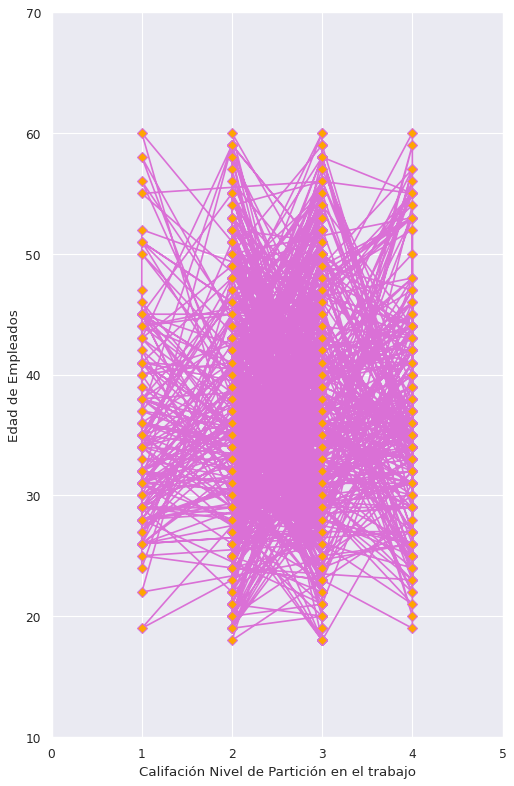

In [41]:
# Genero un gráfico para analizar la marcación de un patron que se relacione frente a la elección realizada por los empleados en los diferentes rangos de edad
fig1 = plt.figure(dpi = 80)
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(x, y, 'D-', color="orchid", markerfacecolor="orange")
plt.ylabel("Edad de Empleados")
plt.xlabel("Califación Nivel de Partición en el trabajo")
ax1.axis([0,5,10,70])
plt.show()

Conclusión 4:

En este gráfico podemos evidenciar que hay una tendencia de patrón, definidad por la intensidad de los trazos entre la calificación de niveles 2 y 3 en cuanto al nivel de partición en el trabajo que sienten todos los diferentes empleados de la empresa.

*Particularmente si analizamos la continuidad del patrón podremos identificar que los empleados con edades entre los 27 años y 45 años se sienten identificados con su trabajo o transmiten que su relación con su rol le da importancia a su autoestima y se siente util dentro de la organización.*

La sensación de no inclusividad o poca motivación se siente con menos fuerza en empleados con edades jovenes como tipo 18 a 22 años, al igual que en personas mayores a los 55 años.

Igual podemos remarcar algo importante y es que los que calificaron con un menor nivel su partición en el trabajo, fueron personas entre los 28 años y los 35 años, osea empleados de mediana edad. 

***Lo que nos llevaria a pensar que se podrian crear campañas de un enfoque a un publico adulto que les motive alcanzar nuevas metas o ascensos dentro de la compañia que les permita sentirse con un mejor nivel de participación.***

Para el caso de las personas más jovenes y ya los más mayores, los factores pueden estar muy arraigados a la edad. 

Por ejemplo las pocas personas mayores de 55 años que se sienten con un bajo nivel de participación, puede estar sesgado por el tema del retiro u baja energia para sus actividades por tema de habitos de salud relacionados a la edad. Como para las personas muy jovenes, se sienten en esa búsqueda de inclusión o que quizas no se sientan tan motivados al ver tantas personas mayores que ellos y que sus posibilidad de promociones salariales o promociones a otros cargos se vean lejanas.



---

